In [1]:
#read data


import pandas as pd

import numpy as np
import os

import matplotlib.pyplot as plt
data=pd.read_csv(r'C:\Users\hp\Documents\05_M02_DC_train.csv')
faults_df= pd.read_csv(r"C:\Users\hp\Downloads\05_M02_train_fault_data.csv")from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.decomposition import PCA

In [138]:
data.dropna(inplace= True)

In [25]:
data.Lot.nunique()

5688

In [10]:
data[data['Lot']==963].time.min()

3286308

In [15]:
data[(data['time']>3286308) &(data['time']<3286333)].IONGAUGEPRESSURE.median()

-1.456393223673342

In [271]:
data.columns

Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION', 'Failures',
       'Rotation_Speed_Delta'],
      dtype='object')

In [269]:
start=[]
for lot in data.Lot.unique():
    min=data[data['Lot']==lot].time.min()
    start.append(data[(data['time']>min) &(data['time']<(min + 25))].IONGAUGEPRESSURE.median())

In [274]:
flow_cool_ratio=[]
suppressor_beam_current=[]
for lot in data.Lot.unique():
    suppressor_beam_current.append(data[data['Lot']==lot].ETCHSUPPRESSORCURRENT.median()/data[data['Lot']==lot].ETCHBEAMCURRENT.median())
    flow_cool_ratio.append(data[data['Lot']==lot].FLOWCOOLPRESSURE.min()/data[data['Lot']==lot].FLOWCOOLPRESSURE.max())
    
    

In [277]:
wafers_features=pd.DataFrame({'STARTRUNPRESSURE':start,'FLOWCOOLRATIO':flow_cool_ratio, 'SUPPRESSORBEAMCURRENTRATIO':suppressor_beam_current})

In [280]:
wafers_features

,STARTRUNPRESSURE,FLOWCOOLRATIO,SUPPRESSORBEAMCURRENTRATIO
0,-1.456393,-3.062680,1.146628
1,-1.453252,-3.843807,5.270432
2,-1.453435,-3.800718,-0.600942
3,-1.453097,-3.862040,-1.229724
4,-1.456765,-3.837781,1.189467
...,...,...,...
5683,-1.451224,-3.173178,0.961413
5684,-1.451733,-3.179799,3.557411
5685,-1.456366,-3.366100,1.093149
5686,-1.452599,-3.111573,-0.473329


In [139]:
X_train=data[data['Failures']=='Healthy']

X_test=data[data['Failures']=='UnHealthy']

failed=data[data['Failures']=='Failed']

X_test= X_test.append(failed,ignore_index= True)

In [142]:
X_train.shape, X_test.shape

((1470091, 25), (436802, 25))

In [143]:
y_train= X_train['ROTATIONSPEED']

y_test= X_test['ROTATIONSPEED']

In [144]:
X_train.columns

Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION', 'Failures'],
      dtype='object')

In [145]:
X_train.drop(columns=['ROTATIONSPEED','time','Tool','Lot','runnum','Failures'],inplace= True)

X_test.drop(columns=['ROTATIONSPEED','time','Tool','Lot','runnum','Failures'],inplace= True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [146]:
X_train.columns

Index(['stage', 'recipe', 'recipe_step', 'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE',
       'ETCHBEAMCURRENT', 'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT',
       'FLOWCOOLFLOWRATE', 'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK',
       'ETCHPBNGASREADBACK', 'FIXTURETILTANGLE', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION'],
      dtype='object')

In [147]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression()

In [148]:
y_pred = regressor.predict(X_test)

In [150]:
y_pred.shape,X_test.shape,y_test.shape

((436802,), (436802, 19), (436802,))

In [158]:
from sklearn import metrics

print('Mean Absolute Error of Test:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Absolute Error of Train:', metrics.mean_absolute_error(y_train, regressor.predict(X_train))) 

print('Root Mean Squared Error of Test:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error of Train:', np.sqrt(metrics.mean_squared_error(y_train,regressor.predict(X_train))))

Mean Absolute Error of Test: 0.45139104861224993
Mean Absolute Error of Train: 0.4665745564893379
Root Mean Squared Error of Test: 0.64552351897572
Root Mean Squared Error of Train: 0.8188989179211814


In [160]:
import lightgbm as ltb

lgregressor = ltb.LGBMRegressor()
lgregressor.fit(X_train, y_train) #training the algorithm

LGBMRegressor()

In [161]:
y_pred_lg = regressor.predict(X_test)

In [162]:
print('Mean Absolute Error of Test:', metrics.mean_absolute_error(y_test, y_pred_lg)) 
print('Mean Absolute Error of Train:', metrics.mean_absolute_error(y_train, lgregressor.predict(X_train))) 

print('Root Mean Squared Error of Test:', metrics.mean_squared_error(y_test, y_pred_lg))  
print('Root Mean Squared Error of Train:', np.sqrt(metrics.mean_squared_error(y_train,lgregressor.predict(X_train))))

Mean Absolute Error of Test: 0.45139104861224993
Mean Absolute Error of Train: 0.10523148352149063
Root Mean Squared Error of Test: 0.64552351897572
Root Mean Squared Error of Train: 0.3746513373527209


In [169]:
error_train=[]

error_test=[]

y_pred_train= lgregressor.predict(X_train)

error_train= y_train- y_pred_train


In [171]:
error_test= y_test- y_pred_lg

<AxesSubplot:>

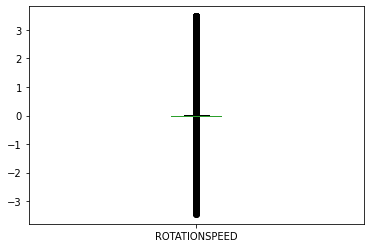

In [176]:
error_train.plot(kind='box')

<AxesSubplot:>

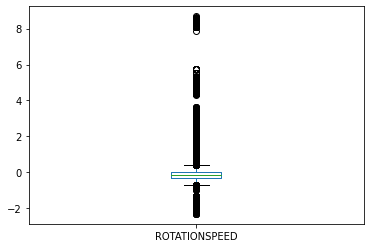

In [177]:
error_test.plot(kind='box')

<AxesSubplot:>

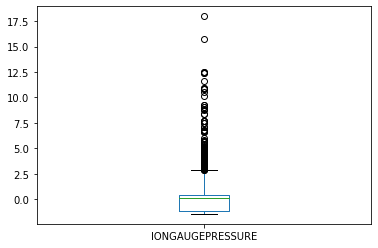

In [181]:
X_train['IONGAUGEPRESSURE'].plot(kind='box')

<AxesSubplot:>

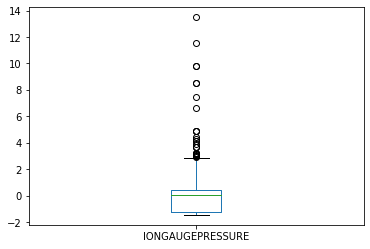

In [182]:
X_test['IONGAUGEPRESSURE'].plot(kind='box')

<AxesSubplot:>

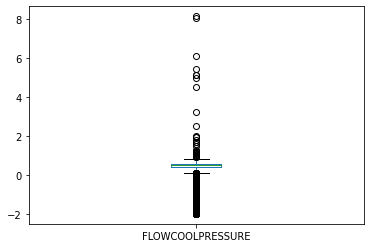

In [183]:
X_train['FLOWCOOLPRESSURE'].plot(kind='box')

<AxesSubplot:>

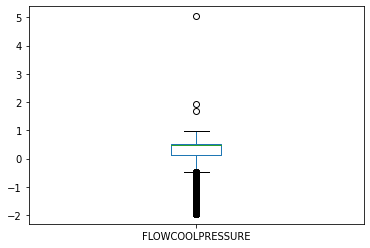

In [184]:
X_test['FLOWCOOLPRESSURE'].plot(kind='box')

<AxesSubplot:>

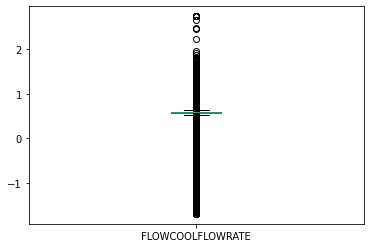

In [186]:
X_train['FLOWCOOLFLOWRATE'].plot(kind='box')

<AxesSubplot:>

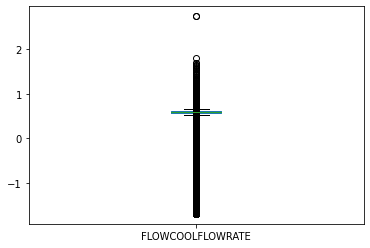

In [185]:
X_test['FLOWCOOLFLOWRATE'].plot(kind='box')

In [188]:
control_df = data[['Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step']]
cooling_control_df = data[['FLOWCOOLFLOWRATE','FLOWCOOLPRESSURE']]
leak_indicators_df = data[['ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK', 'IONGAUGEPRESSURE']]
consumable_df = data[['ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER', 'ETCHAUX2SOURCETIMER']]
settings_df = data[['FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE', 'FIXTURESHUTTERPOSITION']]

X_cooling_control_values = cooling_control_df.values
X_leak_indicators_values = leak_indicators_df.values
X_consumable_values = consumable_df.values
X_setting_values = settings_df.values

pca = PCA(n_components=1)
principalComponents_cooling_control = pca.fit_transform(X_cooling_control_values)
principalComponents_leak_indicators = pca.fit_transform(X_leak_indicators_values)
principalComponents_consumables = pca.fit_transform(X_consumable_values)
principalComponents_settings = pca.fit_transform(X_setting_values)


new_df=pd.DataFrame()
new_df = data[['stage', 'runnum', 'recipe', 'recipe_step','Failures']]
new_df['principalComponents_cooling_control'] = principalComponents_cooling_control
new_df['principalComponents_leak_indicators'] = principalComponents_leak_indicators
new_df['principalComponents_consumables'] = principalComponents_consumables
new_df['principalComponents_settings'] = principalComponents_settings

<ipython-input-188-da3df31442fe>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['principalComponents_cooling_control'] = principalComponents_cooling_control
<ipython-input-188-da3df31442fe>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['principalComponents_leak_indicators'] = principalComponents_leak_indicators
<ipython-input-188-da3df31442fe>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [253]:
X_train_cluster=new_df[new_df['Failures']=='Healthy']

X_test_cluster=new_df[new_df['Failures']=='UnHealthy']

failed=new_df[new_df['Failures']=='Failed']

X_test_cluster= X_test_cluster.append(failed,ignore_index= True)

In [206]:
X_train_cluster.drop(columns=['Failures'],inplace= True)

X_test_cluster.drop(columns=['Failures'],inplace= True)

C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [207]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train_cluster)
    kmeanModel.fit(X_train_cluster)
 
    distortions.append(sum(np.min(cdist(X_train_cluster, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train_cluster.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_train_cluster, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train_cluster.shape[0]
    mapping2[k] = kmeanModel.inertia_

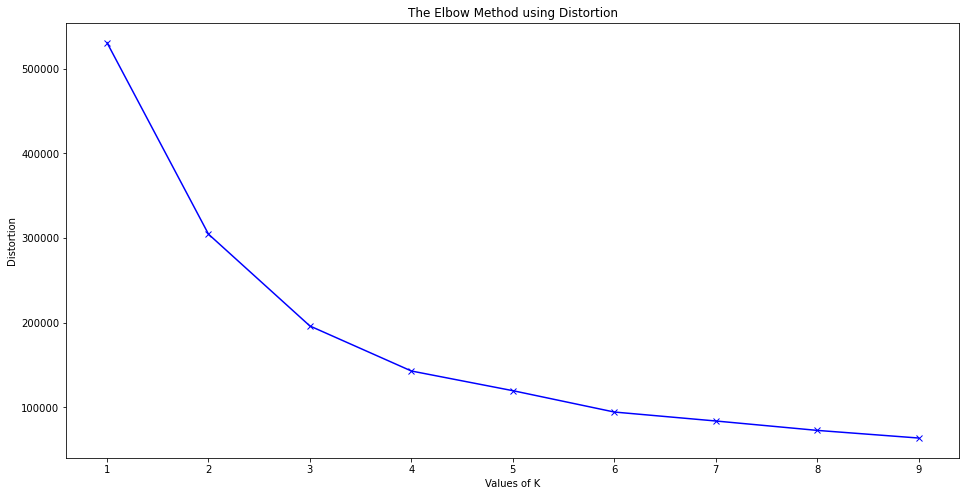

In [208]:
#plot the clusters
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [209]:
kmeans = KMeans(3)
kmeans.fit(X_train_cluster)

KMeans(n_clusters=3)

In [210]:
identified_clusters = kmeans.predict(X_test_cluster)

In [222]:
X_test_cluster['Cluster'].value_counts()

1    396094
2     40699
0         9
Name: Cluster, dtype: int64

In [254]:
X_test_cluster['Cluster']= identified_clusters

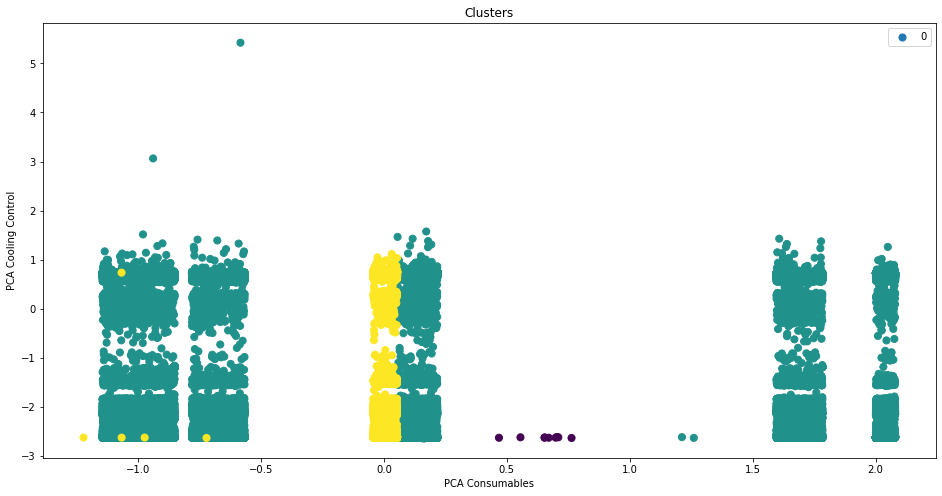

In [251]:
plt.figure(figsize=(16,8))
plt.scatter(X_test_cluster.loc[:,'principalComponents_consumables'], X_test_cluster.loc[:,'principalComponents_cooling_control'], c=identified_clusters, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.legend([0,1,2])
plt.title('Clusters')
plt.xlabel('PCA Consumables')
plt.ylabel('PCA Cooling Control')
plt.legend([0,1,2])

In [218]:
import statsmodels.api as sm

In [255]:
cluster_1= X_test_cluster[X_test_cluster['Cluster']==0]
cluster_2= X_test_cluster[X_test_cluster['Cluster']==1]
cluster_3= X_test_cluster[X_test_cluster['Cluster']==2]


In [256]:
cluster_1['Failures'].value_counts()

Failed    9
Name: Failures, dtype: int64

In [257]:
cluster_2['Failures'].value_counts()

UnHealthy    396092
Failed            2
Name: Failures, dtype: int64

In [266]:
#Cross correlation
x1=sm.tsa.stattools.ccf(failed_cluster['principalComponents_cooling_control'], failed_cluster['principalComponents_consumables'], adjusted=False)
x2=sm.tsa.stattools.ccf(cluster_2['principalComponents_cooling_control'], cluster_2['principalComponents_consumables'], adjusted=False)

In [260]:
cluster_3['Failures'].value_counts()

UnHealthy    40694
Failed           5
Name: Failures, dtype: int64

In [261]:
failed_cluster= pd.concat([cluster_1,cluster_3])

In [264]:
failed_cluster.reset_index(inplace= True)

In [287]:
len(x1), len(x2)

(40708, 396094)

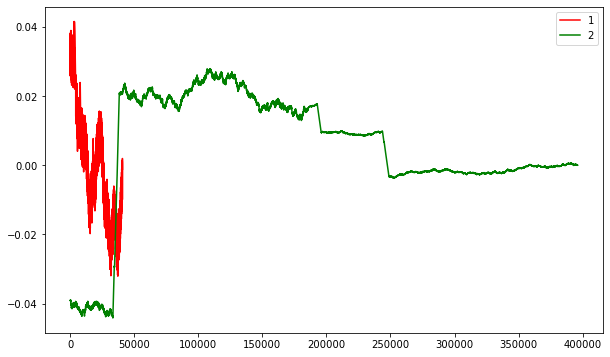

In [286]:
plt.figure(figsize=(10,6))

plt.plot(x1,color='red')

#plt.plot(x2,color='black')
plt.plot(x2,color='green')
plt.legend(['1','2','3'])

In [288]:
#Cross correlation
y1=sm.tsa.stattools.ccf(X_train_cluster['principalComponents_cooling_control'], X_train_cluster['principalComponents_consumables'], adjusted=False)
y2=sm.tsa.stattools.ccf(X_test_cluster['principalComponents_cooling_control'], X_test_cluster['principalComponents_consumables'], adjusted=False)

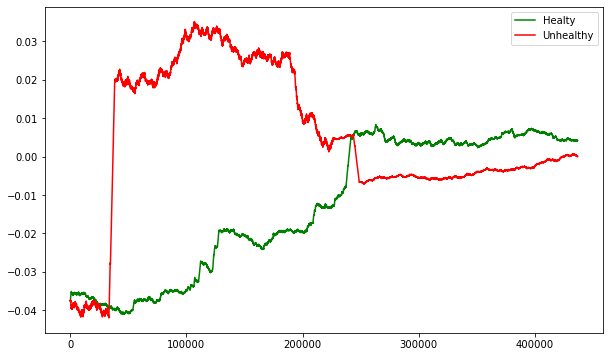

In [293]:
plt.figure(figsize=(10,6))

plt.plot(y1[:436802],color='green')

#plt.plot(x2,color='black')
plt.plot(y2,color='red')
plt.legend(['Healty','Unhealthy'])

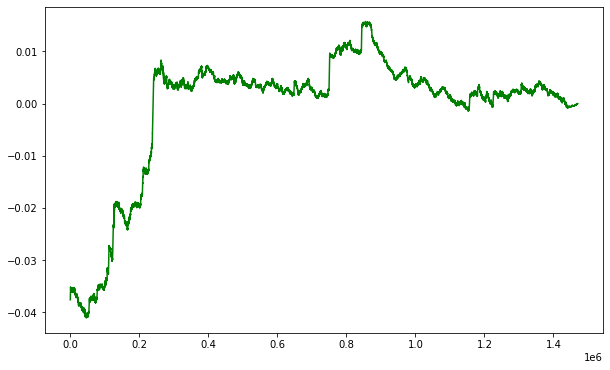

In [296]:
plt.figure(figsize=(10,6))

plt.plot(y1,color='green')

In [ ]:
X_train_cluster.columns

In [2]:
data['Etch Suppresor Power']= data['ETCHSUPPRESSORVOLTAGE']*data['ETCHSUPPRESSORCURRENT']

data['Etch Beam Power']= data['ETCHBEAMVOLTAGE']*data['ETCHBEAMCURRENT']

#data['Change in Angle']= data['ACTUALROTATIONANGLE']/ data['ROTATIONSPEED']

#cols=['stage','recipe','Etch Suppresor Power','Etch Beam Power','Change in Angle','IONGAUGEPRESSURE','FLOWCOOLPRESSURE','FLOWCOOLFLOWRATE']

In [145]:
data = data[data['FIXTURESHUTTERPOSITION'].notna()]

In [186]:
control_df = data[['Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step']]
#cooling_control_df = data[['FLOWCOOLFLOWRATE','FLOWCOOLPRESSURE']]
leak_indicators_df = data[['ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK', 'IONGAUGEPRESSURE']]
consumable_df = data[['ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER', 'ETCHAUX2SOURCETIMER']]
settings_df = data[['FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE', 'FIXTURESHUTTERPOSITION']]

In [187]:
#X_cooling_control_values = cooling_control_df.values
X_leak_indicators_values = leak_indicators_df.values
X_consumable_values = consumable_df.values
X_setting_values = settings_df.values

In [188]:
pca = PCA(n_components=1)
#principalComponents_cooling_control = pca.fit_transform(X_cooling_control_values)
principalComponents_leak_indicators = pca.fit_transform(X_leak_indicators_values)
principalComponents_consumables = pca.fit_transform(X_consumable_values)
principalComponents_settings = pca.fit_transform(X_setting_values)

In [189]:
new_df = data[['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step','Etch Suppresor Power','Etch Beam Power','FLOWCOOLPRESSURE','FLOWCOOLFLOWRATE']]
new_df['principalComponents_cooling_control'] = principalComponents_cooling_control
new_df['principalComponents_leak_indicators'] = principalComponents_leak_indicators
new_df['principalComponents_consumables'] = principalComponents_consumables
new_df['principalComponents_settings'] = principalComponents_settings

<ipython-input-189-531d7dd7269e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['principalComponents_cooling_control'] = principalComponents_cooling_control
<ipython-input-189-531d7dd7269e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['principalComponents_leak_indicators'] = principalComponents_leak_indicators
<ipython-input-189-531d7dd7269e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

In [191]:
new_df.dropna(inplace= True)

<ipython-input-191-0b1575d6f52b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.dropna(inplace= True)


In [192]:
new_df.isna().sum()

time                                   0
Tool                                   0
stage                                  0
Lot                                    0
runnum                                 0
recipe                                 0
recipe_step                            0
Etch Suppresor Power                   0
Etch Beam Power                        0
FLOWCOOLPRESSURE                       0
FLOWCOOLFLOWRATE                       0
principalComponents_cooling_control    0
principalComponents_leak_indicators    0
principalComponents_consumables        0
principalComponents_settings           0
dtype: int64

In [193]:
X= new_df.drop(columns=['time'])

In [194]:
X.drop(columns=['Tool'],inplace= True)

In [195]:
X_train= X[X.index<6898]

In [196]:
X_test=X[X.index>=6898]

In [197]:
X_train.shape

(6898, 13)

# Clustering: 

In [198]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X_train)
    kmeanModel.fit(X_train)
 
    distortions.append(sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_train, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_train.shape[0]
    mapping2[k] = kmeanModel.inertia_

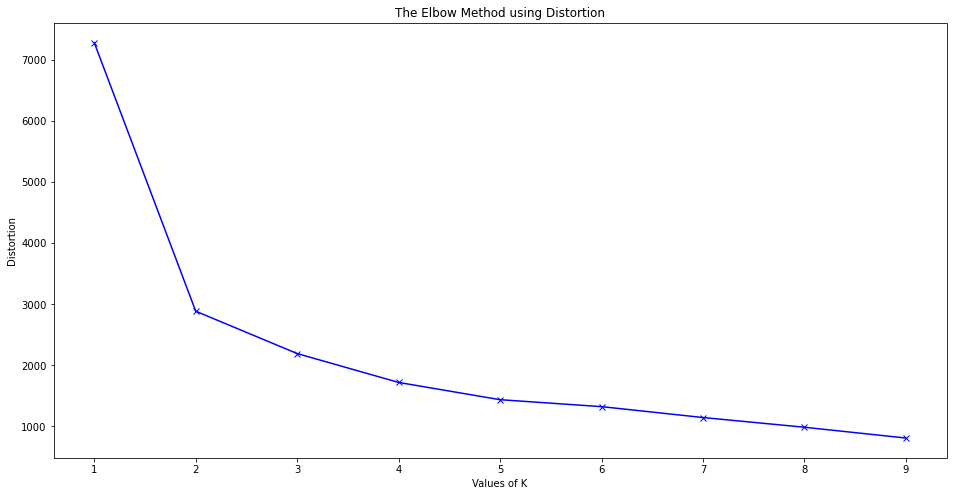

In [199]:
#plot the clusters
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [200]:
kmeans = KMeans(2)
kmeans.fit(X_train)

KMeans(n_clusters=2)

In [201]:
identified_clusters = kmeans.predict(X_test)

In [202]:
label=identified_clusters

In [203]:
len(label)

1899995

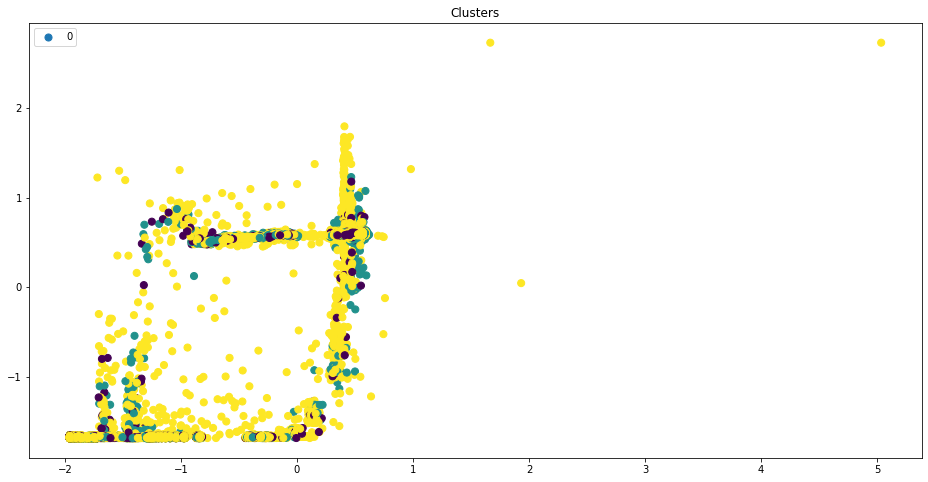

In [199]:
plt.figure(figsize=(16,8))
plt.scatter(X_test.loc[:, 'FLOWCOOLPRESSURE'], X_test.loc[:,'FLOWCOOLFLOWRATE'], c=identified_clusters, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.title('Clusters')
plt.legend([0,1,2])

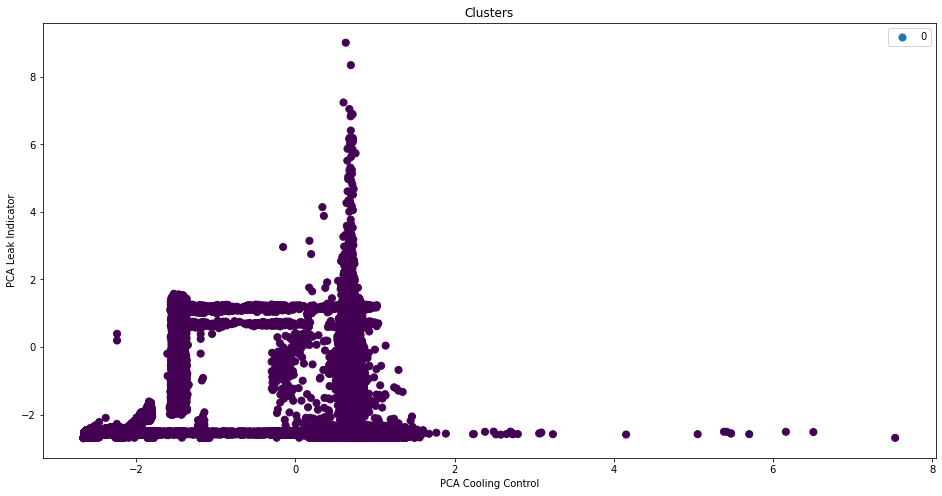

In [264]:
plt.figure(figsize=(16,8))
plt.scatter(X_test.loc[:, 'principalComponents_cooling_control'], X_test.loc[:,'principalComponents_leak_indicators'], c=label, s=50, cmap='viridis')

#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('PCA Cooling Control')
plt.ylabel('PCA Leak Indicator')
plt.title('Clusters')
plt.legend([0,1,2])

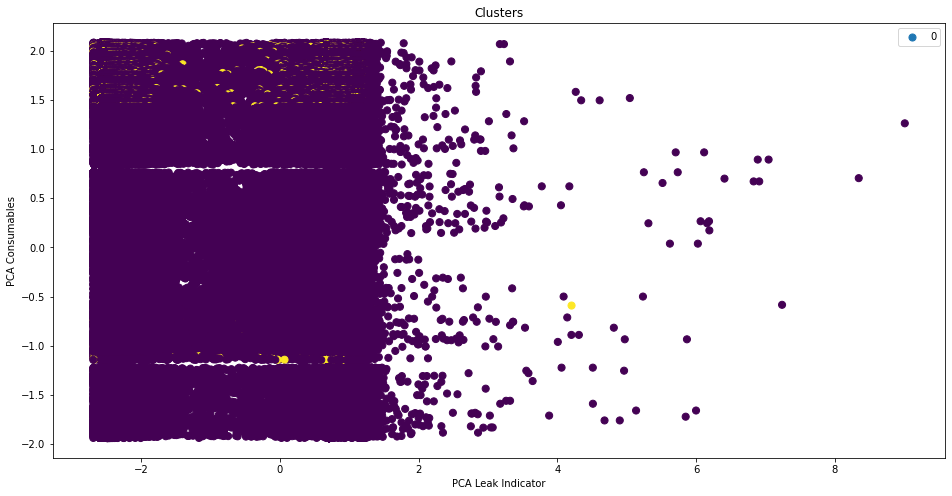

In [265]:
plt.figure(figsize=(16,8))
plt.scatter(X_test.loc[:, 'principalComponents_leak_indicators'], X_test.loc[:,'principalComponents_consumables'], c=label, s=50, cmap='viridis')

#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.xlabel('PCA Leak Indicator')
plt.ylabel('PCA Consumables')
plt.title('Clusters')
plt.legend([0,1,2])

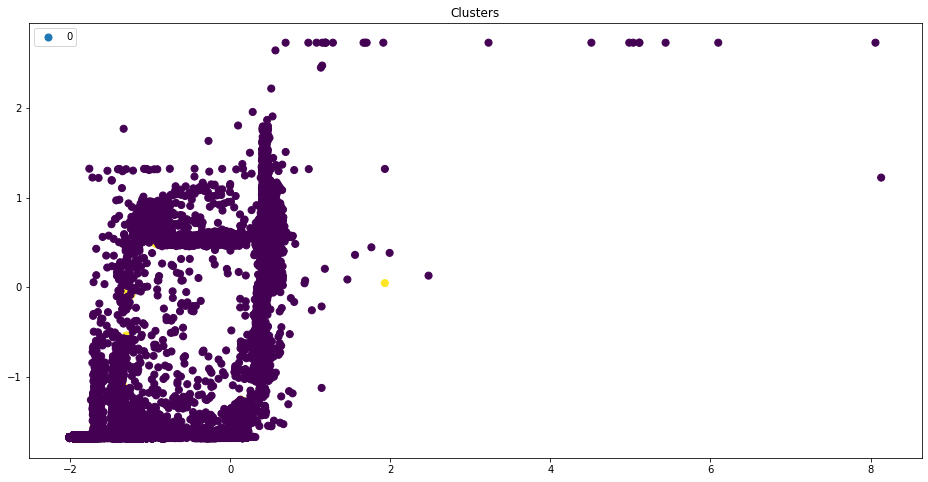

In [205]:
plt.figure(figsize=(16,8))
plt.scatter(X_test.loc[:, 'FLOWCOOLPRESSURE'], X_test.loc[:,'FLOWCOOLFLOWRATE'], c=label, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.title('Clusters')
plt.legend([0,1,2])

In [91]:
data_with_cluster=data.copy()
data_with_cluster.loc[len(X_train):len(data_with_cluster),'Cluster']=label


In [119]:
pressure_x.set_index('time',inplace= True)

pressure_x

,FLOWCOOLPRESSURE,FLOWCOOLFLOWRATE
time,,
3574886,-1.954989,-1.675421
3574890,-1.954989,-1.675421
3574894,-1.954989,-1.675421
3574898,-1.954989,-1.675421
3574902,-1.954989,-1.675421
...,...,...
43250826,-1.954989,-1.671915
43250830,-1.955631,-1.671915
43250834,-1.956274,-1.671915


In [129]:
import statsmodels.api as sm

#calculate cross correlation
x=sm.tsa.stattools.ccf(pressure_x['FLOWCOOLPRESSURE'], pressure_x['FLOWCOOLFLOWRATE'], adjusted=False)

In [131]:
y=sm.tsa.stattools.ccf(cluster_2['FLOWCOOLPRESSURE'],cluster_2['FLOWCOOLFLOWRATE'],adjusted=False)

In [262]:
len(x),len(y)

(1239180, 661024)

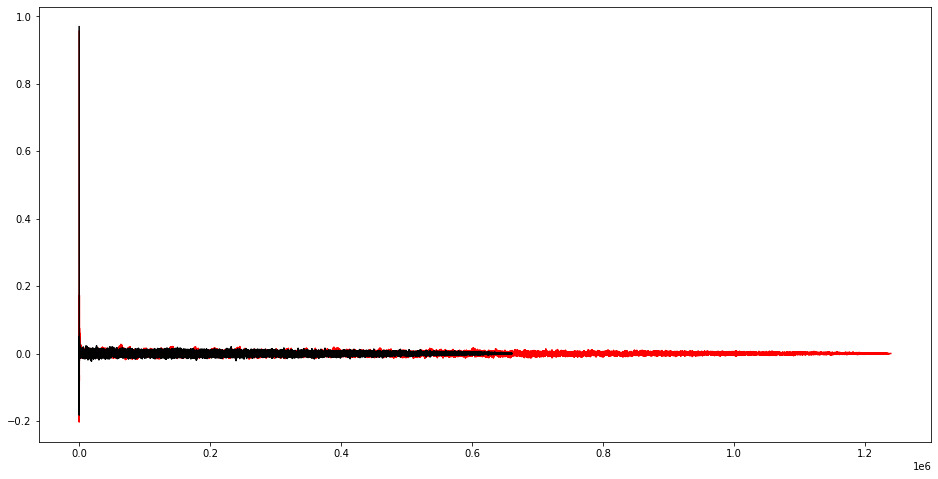

In [138]:
plt.figure(figsize=(16,8))

plt.plot(x,color='red')

plt.plot(y,color='black')


In [206]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
 
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

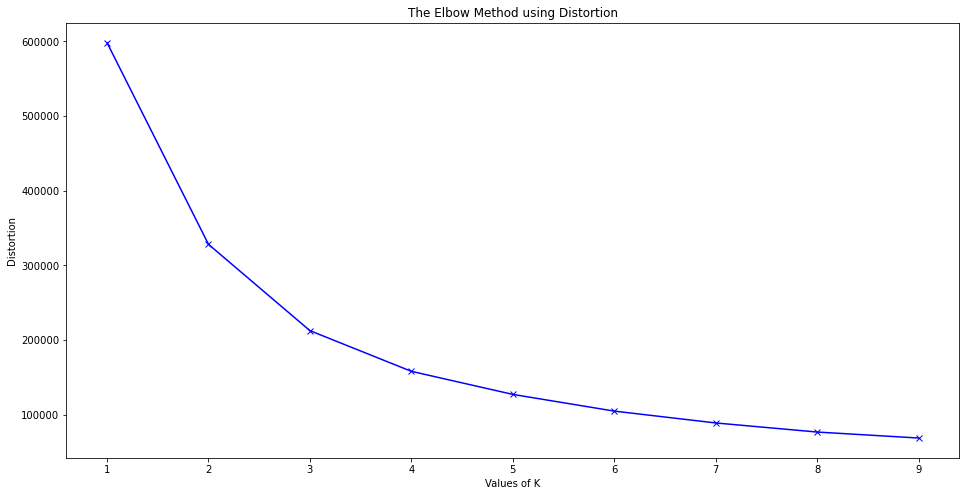

In [207]:
#plot the clusters
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [293]:
kmeans = KMeans(3)
kmeans.fit(X)

labels= kmeans.fit_predict(X)

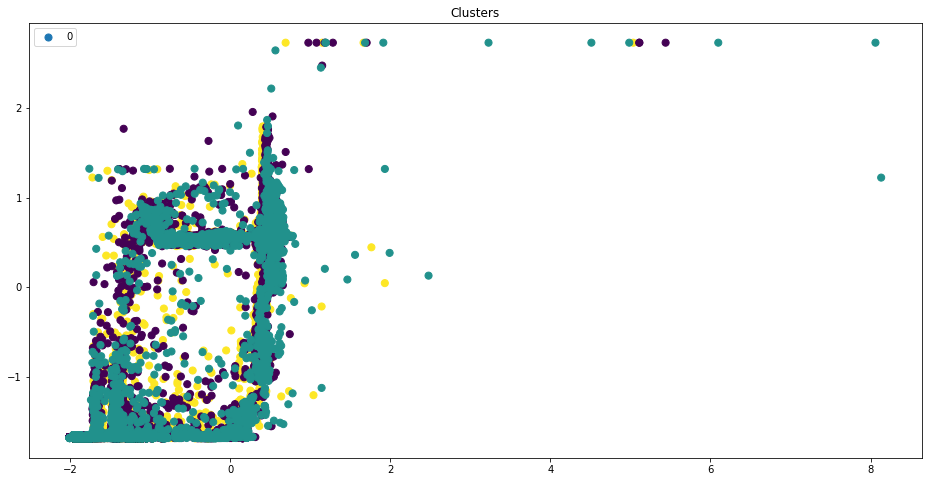

In [294]:
plt.figure(figsize=(16,8))
plt.scatter(X.loc[:, 'FLOWCOOLPRESSURE'], X.loc[:,'FLOWCOOLFLOWRATE'], c=labels, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

plt.title('Clusters')
plt.legend([0,1,2])

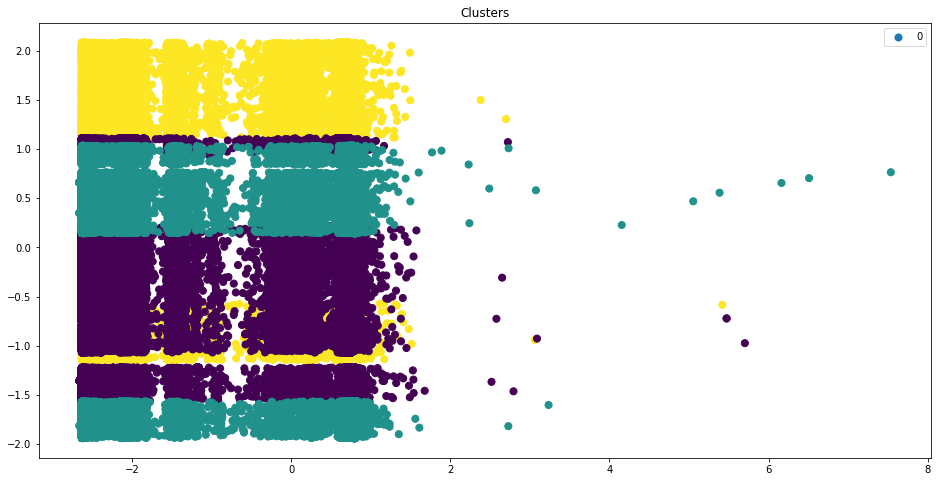

In [295]:
plt.figure(figsize=(16,8))
plt.scatter(X.loc[:, 'principalComponents_cooling_control'], X.loc[:,'principalComponents_consumables'], c=labels, s=50, cmap='viridis')
plt.title('Clusters')
plt.legend([0,1,2])

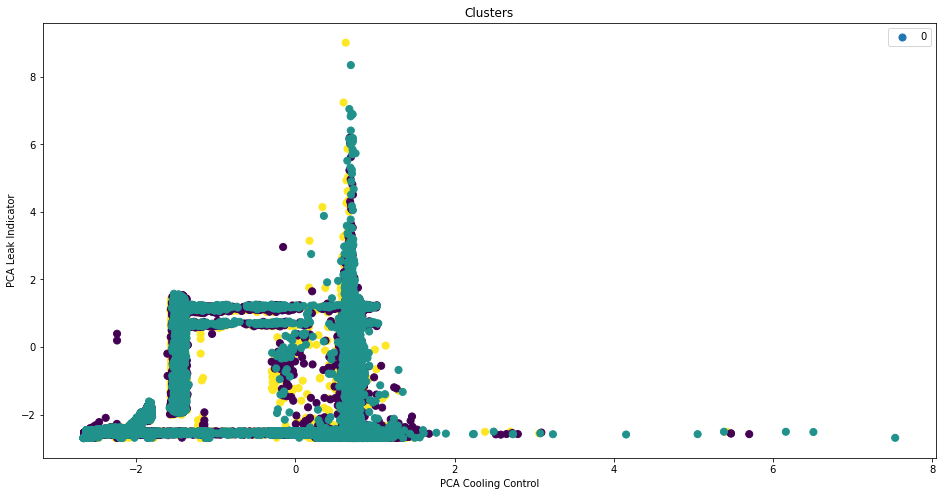

In [296]:
plt.figure(figsize=(16,8))
plt.scatter(X.loc[:, 'principalComponents_cooling_control'], X.loc[:,'principalComponents_leak_indicators'], c=labels, s=50, cmap='viridis')
plt.title('Clusters')
plt.xlabel('PCA Cooling Control')
plt.ylabel('PCA Leak Indicator')
plt.legend([0,1,2])

In [297]:
data_with_clusters= pd.DataFrame()

data_with_clusters=new_df.copy()

In [298]:
data_with_clusters.dropna(inplace=True)

len(labels), len(data_with_clusters)

(1906893, 1906893)

In [299]:
new_df.shape

(1906893, 15)

In [304]:
np.unique(labels)

array([0, 1, 2])

In [300]:
data_with_clusters['Cluster']=labels

In [301]:
data_with_clusters.columns

Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'Etch Suppresor Power', 'Etch Beam Power', 'FLOWCOOLPRESSURE',
       'FLOWCOOLFLOWRATE', 'principalComponents_cooling_control',
       'principalComponents_leak_indicators',
       'principalComponents_consumables', 'principalComponents_settings',
       'Cluster'],
      dtype='object')

In [305]:
cluster_1=pd.DataFrame()

cluster_2= pd.DataFrame()

cluster_3=pd.DataFrame()

cluster_1= data_with_clusters[data_with_clusters['Cluster']==0]

cluster_2= data_with_clusters[data_with_clusters['Cluster']==1]

cluster_3=data_with_clusters[data_with_clusters['Cluster']==2]

In [251]:
data_with_clusters[data_with_clusters['Cluster']==0].columns

Index(['time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'Etch Suppresor Power', 'Etch Beam Power', 'FLOWCOOLPRESSURE',
       'FLOWCOOLFLOWRATE', 'principalComponents_cooling_control',
       'principalComponents_leak_indicators',
       'principalComponents_consumables', 'principalComponents_settings',
       'Cluster'],
      dtype='object')

In [253]:
#Cross correlation
x1=sm.tsa.stattools.ccf(cluster_1['FLOWCOOLPRESSURE'], cluster_1['FLOWCOOLFLOWRATE'], adjusted=False)
x2=sm.tsa.stattools.ccf(cluster_2['FLOWCOOLPRESSURE'], cluster_2['FLOWCOOLFLOWRATE'], adjusted=False)

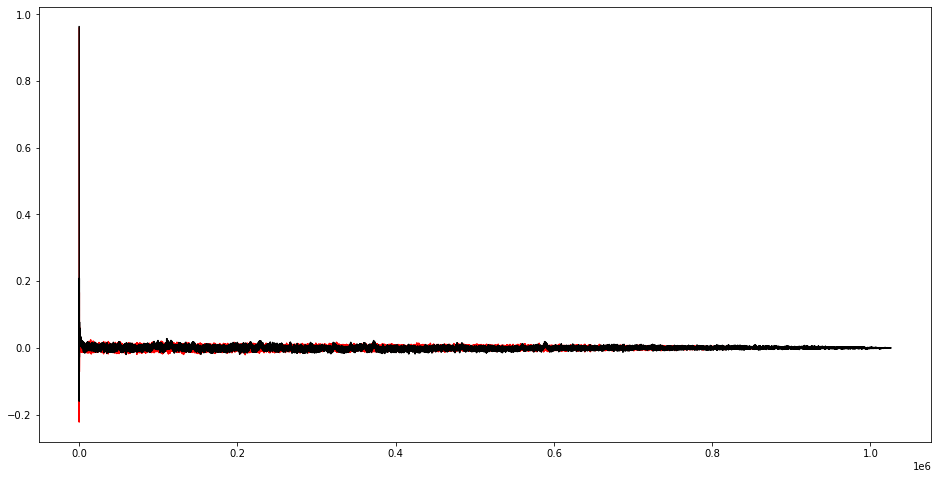

In [255]:
plt.figure(figsize=(16,8))

plt.plot(x1,color='red')

plt.plot(x2,color='black')

In [329]:
#Cross correlation
y1=sm.tsa.stattools.ccf(cluster_1['principalComponents_cooling_control'], cluster_1['principalComponents_consumables'], adjusted=False)
y2=sm.tsa.stattools.ccf(cluster_2['principalComponents_cooling_control'], cluster_2['principalComponents_consumables'], adjusted=False)
y3=sm.tsa.stattools.ccf(cluster_3['principalComponents_cooling_control'], cluster_3['principalComponents_consumables'], adjusted=False)

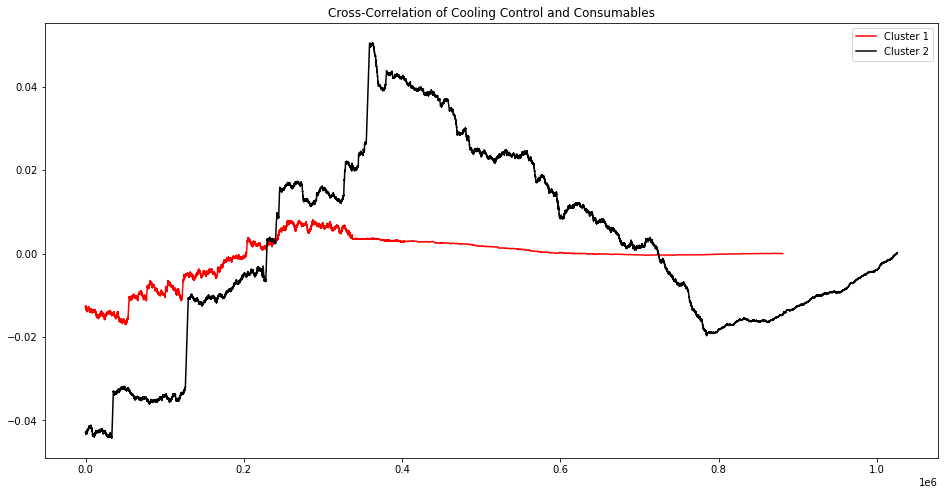

In [270]:
plt.figure(figsize=(16,8))

plt.plot(y1,color='red')

plt.plot(y2,color='black')

plt.plot(y2,color='green')

plt.title('Cross-Correlation of Cooling Control and Consumables')

plt.legend(['Cluster 1','Cluster 2'])

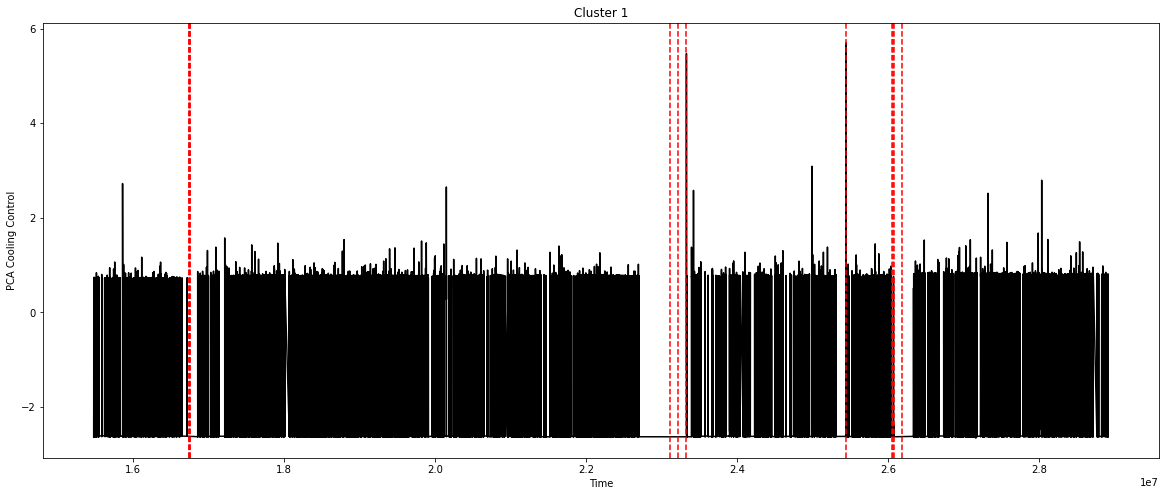

In [319]:
plt.figure(figsize=(20,8))

# plot line
plt.plot(cluster_1['time'],cluster_1['principalComponents_cooling_control'],color= 'black')

xcoords= faults_df.time[6:18]
for xc in xcoords:
    plt.axvline(x= xc,linewidth=1.5,linestyle ="--",color='r')
plt.title('Cluster 1') 
plt.xlabel('Time')
plt.ylabel('PCA Cooling Control')
plt.show()

In [409]:
cluster_1[cluster_1['principalComponents_cooling_control']<-2]

,time,Tool,stage,Lot,runnum,recipe,recipe_step,Etch Suppresor Power,Etch Beam Power,FLOWCOOLPRESSURE,FLOWCOOLFLOWRATE,principalComponents_cooling_control,principalComponents_leak_indicators,principalComponents_consumables,principalComponents_settings,Cluster
665201,15481652,05M02,1,3412,11302954,144,1.0,1.769200,1.616090,-1.955631,-1.684184,-2.625829,-2.502475,1.108045,-0.726591,0
665202,15481656,05M02,1,3412,11302954,144,1.0,1.768688,1.616602,-1.955631,-1.684184,-2.625829,-2.502405,1.108045,-0.726591,0
665203,15481660,05M02,1,3412,11302954,144,1.0,1.772778,1.616807,-1.955631,-1.684184,-2.625829,-2.501570,1.108045,-0.726591,0
665204,15481664,05M02,1,3412,11302954,144,1.0,1.773800,1.616705,-1.955631,-1.684184,-2.625829,-2.501572,1.108045,-0.726591,0
665205,15481668,05M02,1,3412,11302954,144,1.0,1.773800,1.616705,-1.955631,-1.684184,-2.625829,-2.501742,1.108045,-0.726591,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1399520,28910340,05M02,19,13621,12154887,147,5.0,1.768688,1.616192,-1.955631,-1.680679,-2.623324,-2.500366,-1.567039,-0.678321,0
1399521,28910344,05M02,19,13621,12154887,147,5.0,1.770222,1.615680,-1.956274,-1.680679,-2.623774,-2.502248,-1.567039,-0.678321,0
1399522,28910348,05M02,19,13621,12154887,147,5.0,1.767155,1.615271,-1.956916,-1.680679,-2.624223,-2.502386,-1.567039,-0.678321,0
1399523,28910352,05M02,19,13621,12154887,147,5.0,1.769200,1.616295,-1.957559,-1.680679,-2.624673,-2.502421,-1.567039,-0.678321,0


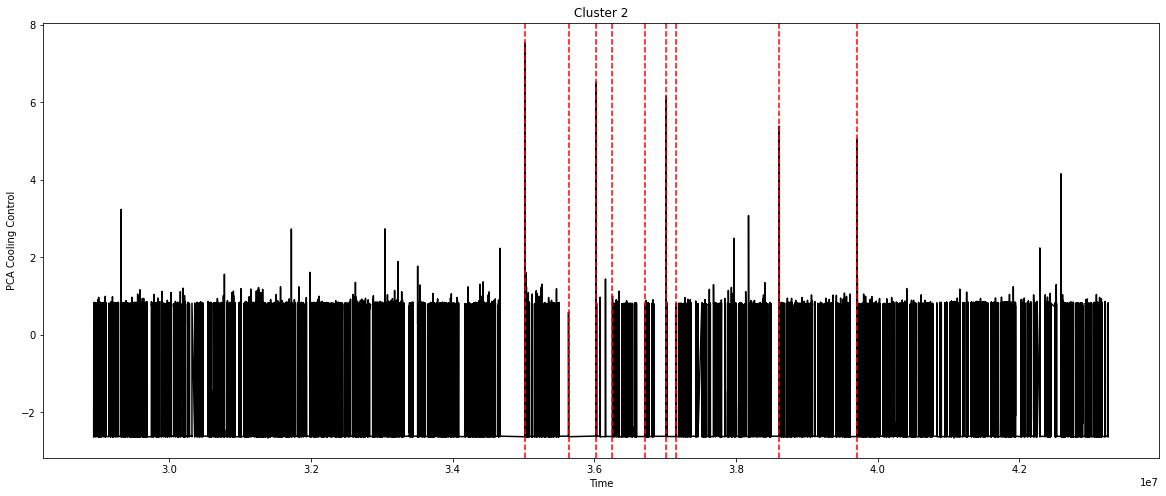

In [318]:
plt.figure(figsize=(20,8))

# plot line
plt.plot(cluster_2['time'],cluster_2['principalComponents_cooling_control'],color= 'black')

xcoords= faults_df.time[19:]
for xc in xcoords:
    plt.axvline(x= xc,linewidth=1.5,linestyle ="--",color='r')
plt.title('Cluster 2')
plt.xlabel('Time')
plt.ylabel('PCA Cooling Control')
plt.show()

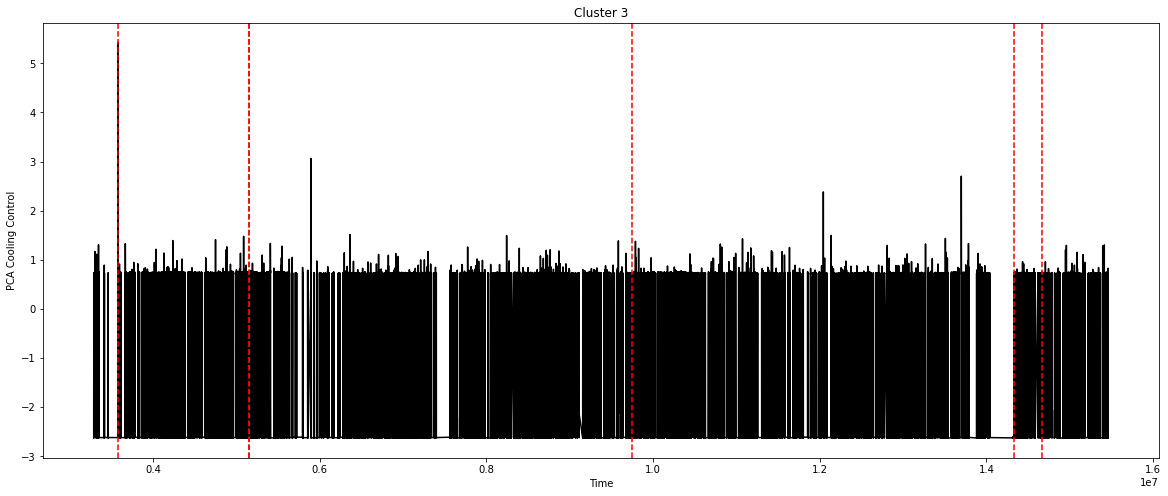

In [324]:
plt.figure(figsize=(20,8))

# plot line
plt.plot(cluster_3['time'],cluster_3['principalComponents_cooling_control'],color= 'black')

xcoords= faults_df.time[:6]
for xc in xcoords:
    plt.axvline(x= xc,linewidth=1.5,linestyle ="--",color='r')
plt.title('Cluster 3')
plt.xlabel('Time')
plt.ylabel('PCA Cooling Control')
plt.show()

In [352]:
faults_df[faults_df.index==19].time

19    35019960
Name: time, dtype: int64

In [27]:
#Function to find closest failures

def find_neighbours(value, df, colname):
    exactmatch = df[df[colname] == value]
    if not exactmatch.empty:
        return exactmatch.index
    else:
        upperneighbour_ind = df[df[colname] > value][colname].idxmin()
        return  upperneighbour_ind 

In [360]:
for fault in faults_df[19:].time:
    print(f"Fault:{fault} :Index : {find_neighbours(fault,cluster_2,'time')}" )
    

Fault:35019960 :Index : 1646615
Fault:35635818 :Index : 1670178
Fault:36023990 :Index : 1670568
Fault:36256362 :Index : 1672785
Fault:36717166 :Index : 1685113
Fault:37013572 :Index : 1691859
Fault:37148714 :Index : 1693499
Fault:38610524 :Index : 1736111
Fault:39706772 :Index : 1773169


In [384]:
f1= cluster_2[(cluster_2.index>1646515) & (cluster_2.index<=1646615)]

f1.reset_index(inplace= True)

f2= cluster_2[(cluster_2.index>1670078) & (cluster_2.index<=1670178)]
f2.reset_index(inplace=True)

f3= cluster_2[(cluster_2.index>11670468) & (cluster_2.index<=11670568)]
f3.reset_index(inplace=True)


f4= cluster_2[(cluster_2.index>1672685) & (cluster_2.index<=1672785)]
f4.reset_index(inplace=True)

f5= cluster_2[(cluster_2.index>1685013) & (cluster_2.index<=1685113)]
f5.reset_index(inplace=True)

f6= cluster_2[(cluster_2.index>1691759) & (cluster_2.index<=1691859)]
f6.reset_index(inplace=True)

f7= cluster_2[(cluster_2.index>1693399) & (cluster_2.index<=1693499)]
f7.reset_index(inplace=True)

f8= cluster_2[(cluster_2.index>1736011) & (cluster_2.index<=1736111)]
f8.reset_index(inplace=True)

f9= cluster_2[(cluster_2.index>11670468) & (cluster_2.index<=11670568)]
f9.reset_index(inplace=True)

f10= cluster_2[(cluster_2.index>1773069) & (cluster_2.index<=1773169)]
f10.reset_index(inplace=True)


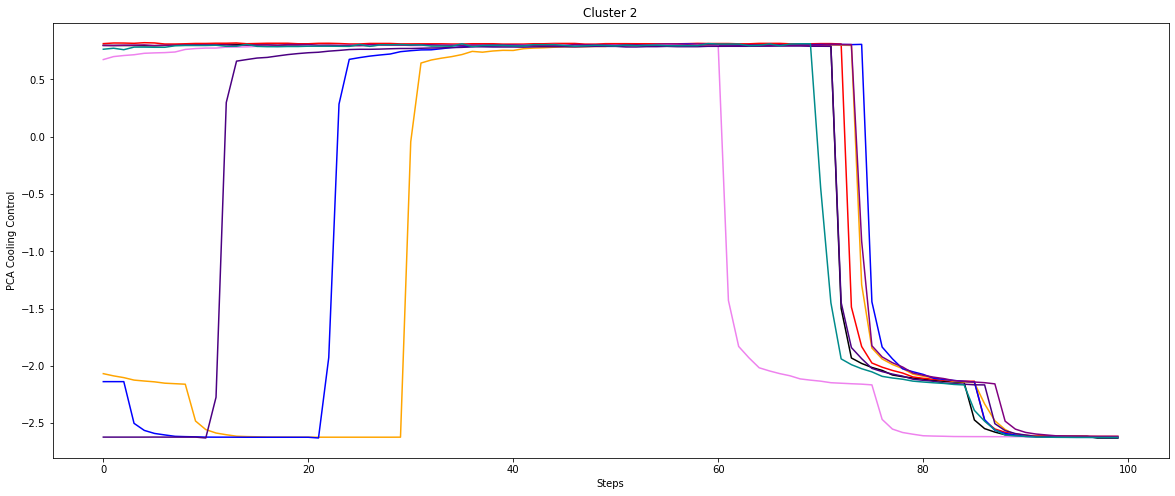

In [385]:
plt.figure(figsize=(20,8))

# plot line
plt.plot(f1.index,f1['principalComponents_cooling_control'],color= 'black')
plt.plot(f2.index,f2['principalComponents_cooling_control'],color= 'red')
plt.plot(f3.index,f3['principalComponents_cooling_control'],color= 'green')
plt.plot(f4.index,f4['principalComponents_cooling_control'],color= 'orange')
plt.plot(f5.index,f5['principalComponents_cooling_control'],color= 'blue')
plt.plot(f6.index,f6['principalComponents_cooling_control'],color= 'violet')
plt.plot(f7.index,f7['principalComponents_cooling_control'],color= 'indigo')
plt.plot(f8.index,f8['principalComponents_cooling_control'],color= 'purple')
plt.plot(f9.index,f9['principalComponents_cooling_control'],color= 'darkred')
plt.plot(f10.index,f10['principalComponents_cooling_control'],color= 'darkcyan')


#plt.axvline(x= 16746750,linewidth=1.5,linestyle ="--",color='r')
plt.title('Cluster 2')
plt.xlabel('Steps')
plt.ylabel('PCA Cooling Control')
plt.show()

In [398]:
healthy_at_cluster_2= cluster_2[~cluster_2.time.isin(failures_at_cluster_2.time)]

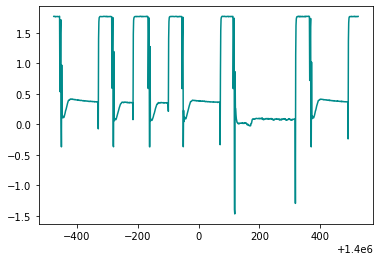

In [428]:
plt.plot(healthy_at_cluster_2[:1000].index,healthy_at_cluster_2[:1000]['Etch Suppresor Power'],color= 'darkcyan')

In [388]:
failures_at_cluster_2=pd.concat([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10])

In [412]:
failures_at_cluster_2.shape

(800, 17)

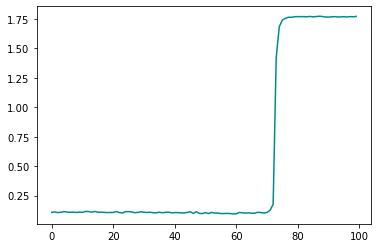

In [425]:
plt.plot(failures_at_cluster_2[:100].index,failures_at_cluster_2[:100]['Etch Suppresor Power'],color= 'darkcyan')

In [420]:
failures_at_cluster_2.columns

Index(['index', 'time', 'Tool', 'stage', 'Lot', 'runnum', 'recipe',
       'recipe_step', 'Etch Suppresor Power', 'Etch Beam Power',
       'FLOWCOOLPRESSURE', 'FLOWCOOLFLOWRATE',
       'principalComponents_cooling_control',
       'principalComponents_leak_indicators',
       'principalComponents_consumables', 'principalComponents_settings',
       'Cluster'],
      dtype='object')

<AxesSubplot:>

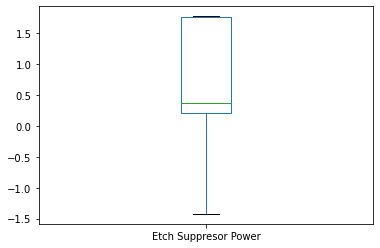

In [421]:
failures_at_cluster_2['Etch Suppresor Power'].plot(kind='box')

<AxesSubplot:>

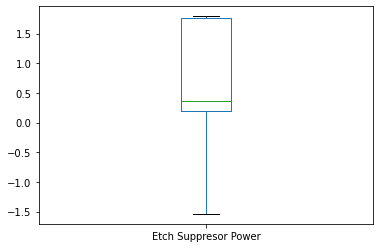

In [422]:
healthy_at_cluster_2['Etch Suppresor Power'].plot(kind='box')

In [401]:
for fault in faults_df[6:18].time:
    print(f"Fault:{fault} :Index : {find_neighbours(fault,cluster_1,'time')}" )
    

Fault:16746750 :Index : 726997
Fault:16748980 :Index : 726997
Fault:16750714 :Index : 726997
Fault:16756186 :Index : 726997
Fault:23112688 :Index : 1114539
Fault:23209388 :Index : 1114539
Fault:23326898 :Index : 1114539
Fault:25441626 :Index : 1213185
Fault:26050762 :Index : 1251219
Fault:26067786 :Index : 1251352
Fault:26080144 :Index : 1251781
Fault:26181840 :Index : 1251781


In [414]:
f1= cluster_1[(cluster_1.index>726897) & (cluster_1.index<=726997)]

f1.reset_index(inplace= True)

f2= cluster_1[(cluster_1.index>1114439) & (cluster_1.index<=1114539)]
f2.reset_index(inplace=True)

f3= cluster_1[(cluster_1.index>1213085) & (cluster_1.index<=1213185)]
f3.reset_index(inplace=True)


f4= cluster_1[(cluster_1.index>1251119) & (cluster_1.index<=1251219)]
f4.reset_index(inplace=True)

f5= cluster_1[(cluster_1.index>1251252) & (cluster_1.index<=1251352)]
f5.reset_index(inplace=True)

f6= cluster_1[(cluster_1.index>1251681) & (cluster_1.index<=1251781)]
f6.reset_index(inplace=True)

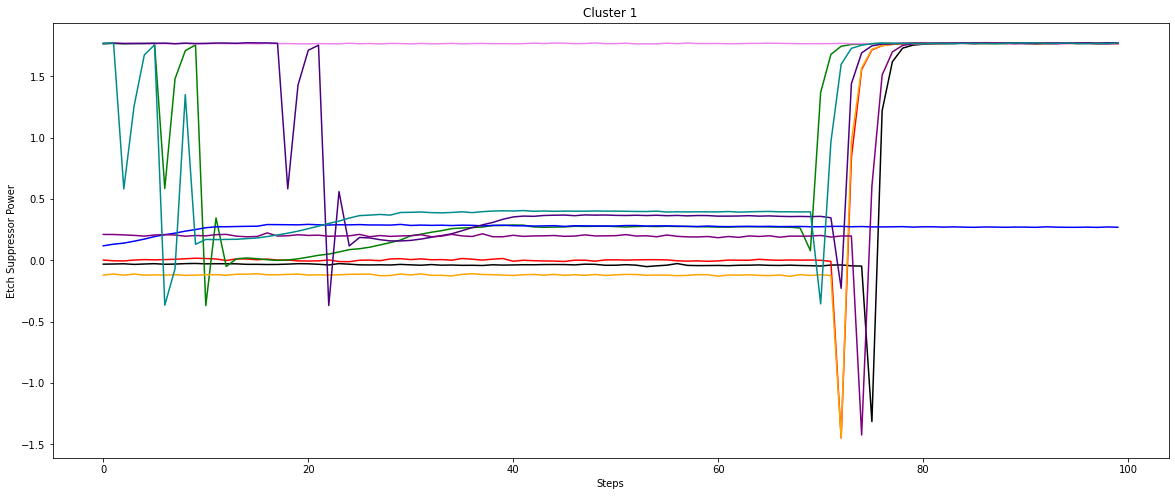

In [426]:
plt.figure(figsize=(20,8))

# plot line
plt.plot(f1.index,f1['Etch Suppresor Power'],color= 'black')
plt.plot(f2.index,f2['Etch Suppresor Power'],color= 'red')
plt.plot(f3.index,f3['Etch Suppresor Power'],color= 'green')
plt.plot(f4.index,f4['Etch Suppresor Power'],color= 'orange')
plt.plot(f5.index,f5['Etch Suppresor Power'],color= 'blue')
plt.plot(f6.index,f6['Etch Suppresor Power'],color= 'violet')
plt.plot(f7.index,f7['Etch Suppresor Power'],color= 'indigo')
plt.plot(f8.index,f8['Etch Suppresor Power'],color= 'purple')
plt.plot(f9.index,f9['Etch Suppresor Power'],color= 'darkred')
plt.plot(f10.index,f10['Etch Suppresor Power'],color= 'darkcyan')


#plt.axvline(x= 16746750,linewidth=1.5,linestyle ="--",color='r')
plt.title('Cluster 1')
plt.xlabel('Steps')
plt.ylabel('Etch Suppressor Power')
plt.show()

# Train Test

In [28]:
index=[]
for fault in faults_df.time:
    index.append(find_neighbours(fault,data,'time'))
    

In [31]:
index[4]=599237

In [32]:
new_list= list(set(index))

In [66]:
len(new_list)

20

In [33]:
new_list.sort()

In [84]:
data['Failures']='Healthy'

In [85]:
data.loc[index,'Failures']='Failed'

In [86]:
data['Failures'].value_counts()

Healthy    1907082
Failed          20
Name: Failures, dtype: int64

In [87]:
import math

In [88]:
#function to get unhealthy
def get_unhealthy(prev_failure_point,next_failure_point,percent):
    healthy_limit= math.floor(percent*next_failure_point)
    data.loc[prev_failure_point:healthy_limit,'Failures']='UnHealthy'
    

In [89]:
previous=0
for i in new_list:
    get_unhealthy(previous,i,0.75)
    previous=i

In [297]:
data['Failures'].value_counts()

Healthy      1470091
UnHealthy     436786
Failed            16
Name: Failures, dtype: int64

In [299]:
class_df= data.copy()

class_df['Failures']= class_df['Failures'].map({'Healthy':1 , 'UnHealthy': 0 , 'Failed':0})

In [300]:
class_df

,time,Tool,stage,Lot,runnum,recipe,recipe_step,IONGAUGEPRESSURE,ETCHBEAMVOLTAGE,ETCHBEAMCURRENT,...,FIXTURETILTANGLE,ROTATIONSPEED,ACTUALROTATIONANGLE,FIXTURESHUTTERPOSITION,ETCHSOURCEUSAGE,ETCHAUXSOURCETIMER,ETCHAUX2SOURCETIMER,ACTUALSTEPDURATION,Failures,Rotation_Speed_Delta
0,3286308,05M02,1,963,10511793,144,1.0,-1.456413,-1.260701,-1.281817,...,1.298660,-0.315698,-0.207056,0.0,0.708946,0.015727,0.061449,2.520568,0,-0.005686
1,3286312,05M02,1,963,10511793,144,1.0,-1.456232,-1.260302,-1.281817,...,1.298660,-0.315698,-0.207056,0.0,0.708946,0.015727,0.061449,2.520568,0,-0.005686
2,3286316,05M02,1,963,10511793,144,1.0,-1.456138,-1.260941,-1.281817,...,1.298660,-0.315698,-0.207056,0.0,0.708946,0.015727,0.061449,2.520568,0,-0.005686
3,3286320,05M02,1,963,10511793,144,1.0,-1.456166,-1.260382,-1.281817,...,1.298660,-0.315698,-0.207056,0.0,0.708946,0.015727,0.061449,2.520568,0,-0.005686
4,3286324,05M02,1,963,10511793,144,1.0,-1.456554,-1.260222,-1.281817,...,1.298660,-0.315698,-0.207056,0.0,0.708946,0.015727,0.061449,2.520568,0,-0.005686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1907097,43254146,05M02,163,12886,13076897,155,3.0,0.122507,-0.254974,0.033491,...,-0.613789,-0.315698,3.883366,1.0,-0.048939,0.770588,0.596711,2.520568,1,0.000000
1907098,43254148,05M02,163,12886,13076897,155,3.0,0.122507,-0.254816,0.023191,...,-0.613789,-0.315698,3.883366,1.0,-0.048933,0.770593,0.596716,2.520568,1,0.000000
1907099,43254154,05M02,163,12886,13076897,155,3.0,0.122507,-0.254897,0.029666,...,-0.613789,-0.315698,3.883366,1.0,-0.048926,0.770600,0.596722,2.520568,1,0.000000
1907100,43254158,05M02,163,12886,13076897,155,3.0,0.122507,-0.254735,0.022529,...,-0.613789,-0.315698,3.883366,1.0,-0.048920,0.770603,0.596724,2.520568,1,0.000000


In [301]:
X= class_df.drop(columns=['Tool','Failures'])

Y=class_df['Failures']

In [302]:
X.columns

Index(['time', 'stage', 'Lot', 'runnum', 'recipe', 'recipe_step',
       'IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK',
       'FIXTURETILTANGLE', 'ROTATIONSPEED', 'ACTUALROTATIONANGLE',
       'FIXTURESHUTTERPOSITION', 'ETCHSOURCEUSAGE', 'ETCHAUXSOURCETIMER',
       'ETCHAUX2SOURCETIMER', 'ACTUALSTEPDURATION', 'Rotation_Speed_Delta'],
      dtype='object')

In [303]:
X= X[['IONGAUGEPRESSURE', 'ETCHBEAMVOLTAGE', 'ETCHBEAMCURRENT',
       'ETCHSUPPRESSORVOLTAGE', 'ETCHSUPPRESSORCURRENT', 'FLOWCOOLFLOWRATE',
       'FLOWCOOLPRESSURE', 'ETCHGASCHANNEL1READBACK', 'ETCHPBNGASREADBACK','FIXTURESHUTTERPOSITION']]

In [313]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.20, random_state = 0)

In [314]:
X_train.shape, X_val.shape

((1525514, 10), (381379, 10))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)